In [51]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy import integrate

from matplotlib import pyplot as plt

(0.0, 0.4683325804901024)

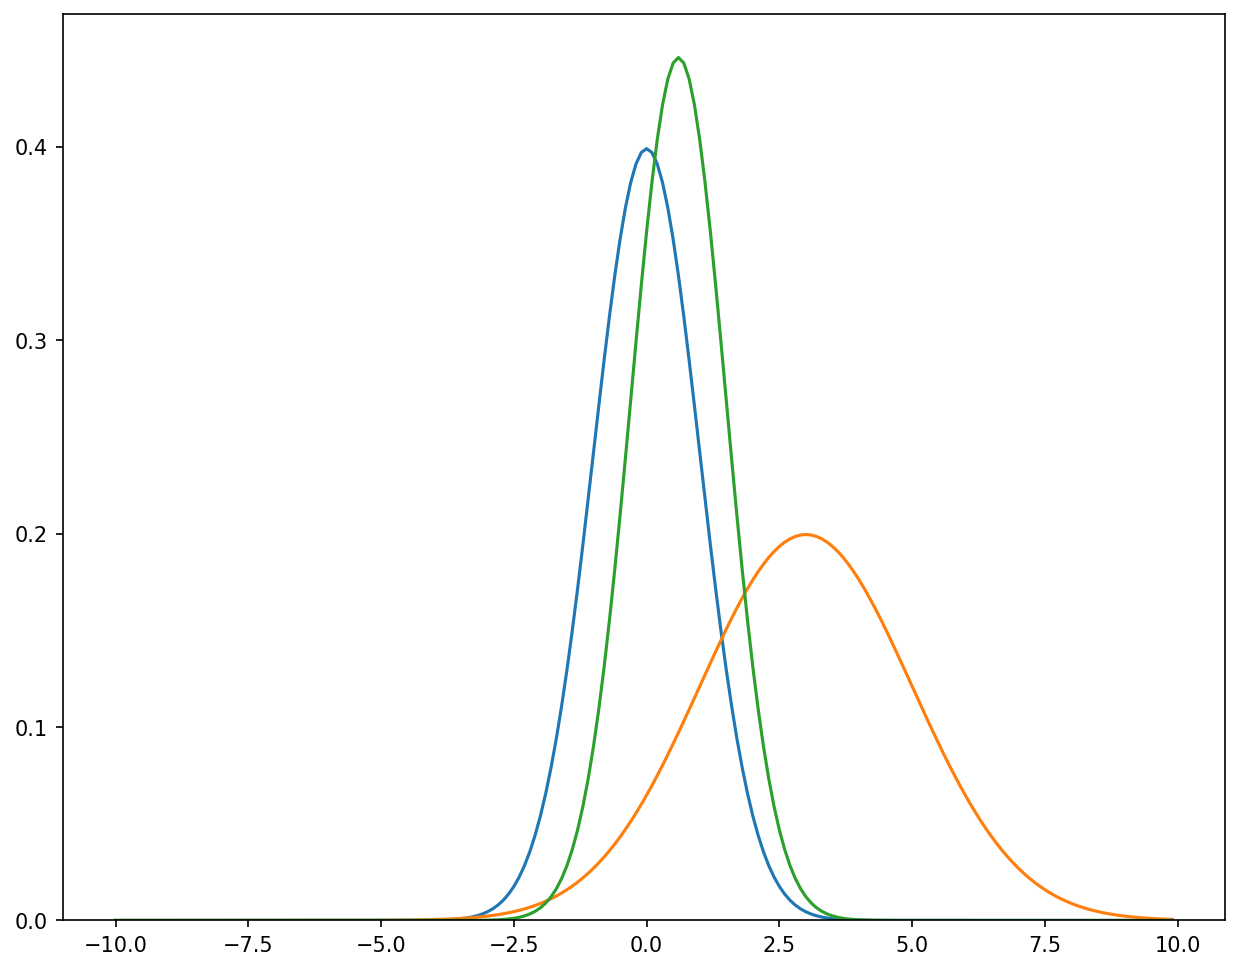

In [56]:
x = np.arange(-10, 10, 0.1)

s_1 = 1
m_1 = 0
y_1 = stats.norm.pdf(x, m_1, s_1)

s_2 = 2
m_2 = 3
y_2 = stats.norm.pdf(x, m_2, s_2)

y_3 = y_2 * y_1
y_3 /= integrate.simpson(y_3, x)

fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)
ax.set_ylim(0)

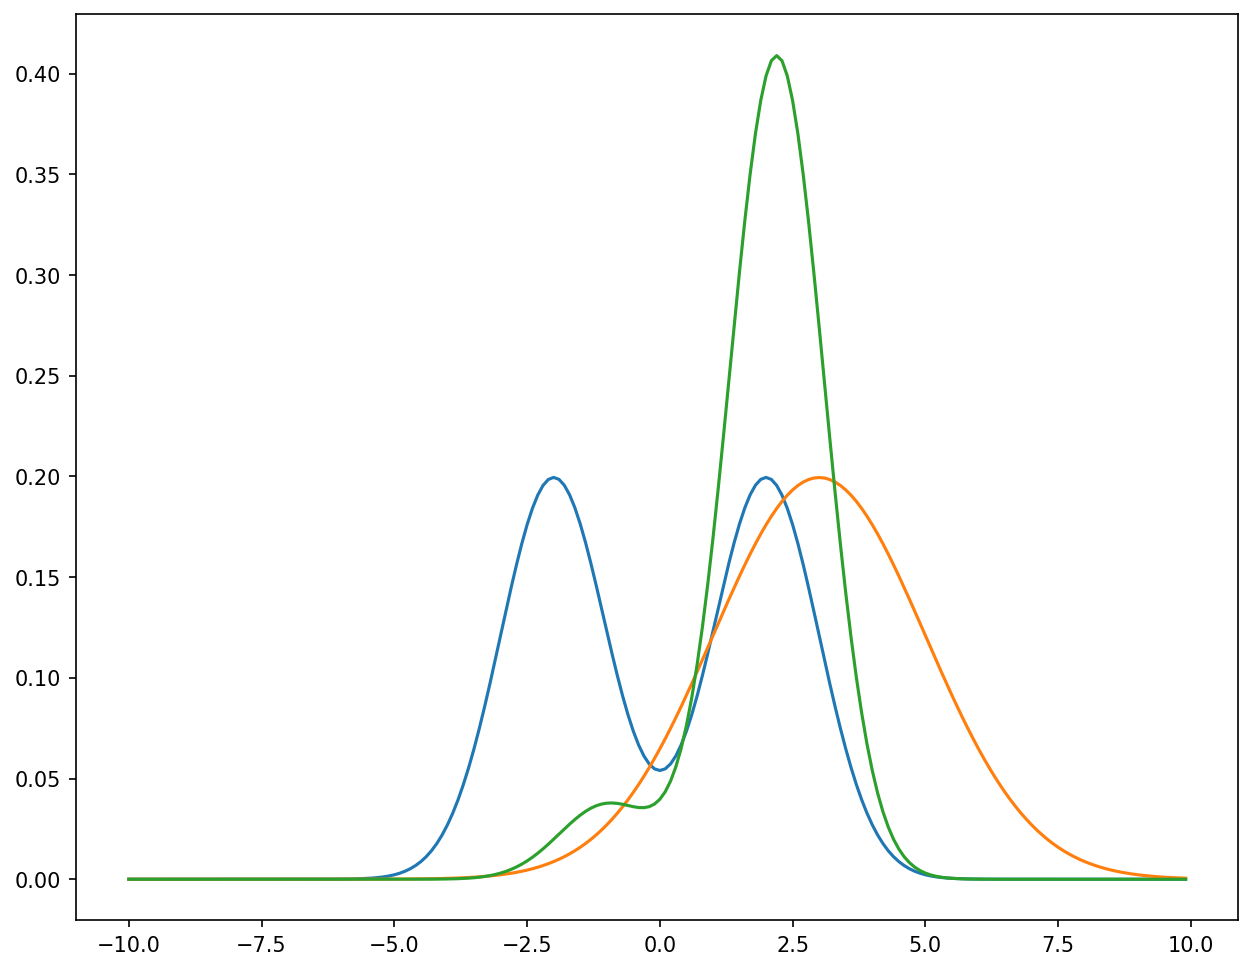

In [57]:
x = np.arange(-10, 10, 0.1)

s_1_1 = 1
m_1_1 = -2
s_1_2 = 1
m_1_2 = 2
y_1 = 0.5 * ( stats.norm.pdf(x, m_1_1, s_1_1)
    + stats.norm.pdf(x, m_1_2, s_1_2) )

s_2 = 2
m_2 = 3
y_2 = stats.norm.pdf(x, m_2, s_2)

y_3 = y_2 * y_1
y_3 /= integrate.simpson(y_3, x)

fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)